In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gtda.diagrams import PairwiseDistance

import collections

from scipy.cluster.hierarchy import cut_tree

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import activations
Activations = activations.Activations

In [4]:
basepath = '../../trained_models/'
file = '10kbatches/steps_20_batch_200_RNN_512_relu_rf_012_DoG_True_plane_lr_00001_weight_decay_00001/activations.npy'
path = basepath + file

ratemaps = np.load(path)

activations = Activations(ratemaps)

In [5]:
sacs = activations.calculate_sacs()

In [6]:
dgms = activations.calculate_dgms(digits=2)

In [7]:
pairdis = PairwiseDistance(metric='silhouette',metric_params={'p':100},order=None)
D = pairdis.fit_transform(dgms)

/home/simone/anaconda3/envs/gc/lib/python3.7/site-packages/gtda/diagrams/_metrics.py:142: RuntimeWarning: invalid value encountered in true_divide
  fibers_weighted_sum = np.sum(weights*fibers, axis=1)/total_weights


In [8]:
D0 = D[:,:,0]

In [9]:
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd

In [10]:
Df = ssd.squareform(D0)

In [11]:
Zs = hierarchy.linkage(Df,method='single')
Zc = hierarchy.linkage(Df,method='complete')
Za = hierarchy.linkage(Df,method='average')
Zw = hierarchy.linkage(Df,method='ward')
Zww = hierarchy.linkage(Df,method='weighted')
Zcc = hierarchy.linkage(Df,method='centroid')
Zm = hierarchy.linkage(Df,method='median')

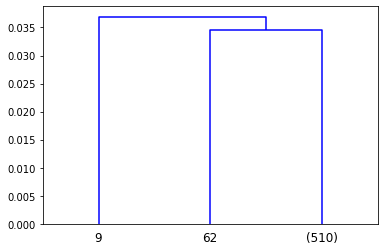

In [12]:
ds = hierarchy.dendrogram(Zs,p=3,truncate_mode='lastp')

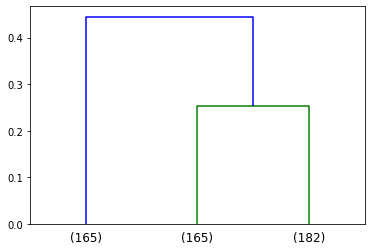

In [13]:
dc = hierarchy.dendrogram(Zc,p=3,truncate_mode='lastp')

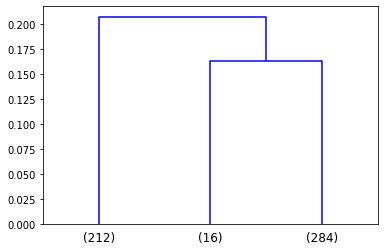

In [14]:
da = hierarchy.dendrogram(Za,p=3,truncate_mode='lastp')

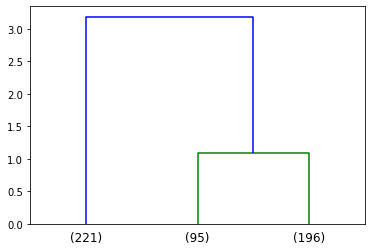

In [15]:
dw = hierarchy.dendrogram(Zw,p=3,truncate_mode='lastp')

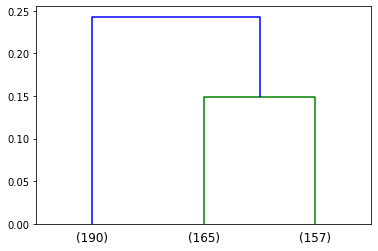

In [16]:
dww = hierarchy.dendrogram(Zww,p=3,truncate_mode='lastp')

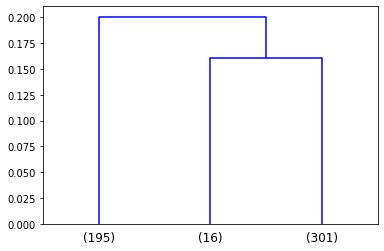

In [17]:
dcc = hierarchy.dendrogram(Zcc,p=3,truncate_mode='lastp')

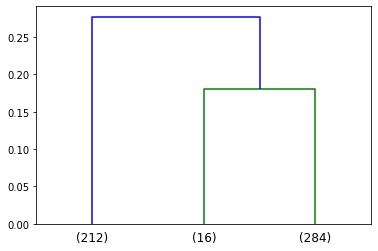

In [18]:
dm = hierarchy.dendrogram(Zm,p=3,truncate_mode='lastp')

In [19]:
cZs = cut_tree(Zs,3)
cZc = cut_tree(Zc,3)
cZa = cut_tree(Za,3)
cZw = cut_tree(Zw,3)
cZww = cut_tree(Zww,3)
cZcc = cut_tree(Zcc,3)
cZm = cut_tree(Zm,3)

In [20]:
labels = np.unique(cZc)
prova = cZc[:,0]
clusters = []
for l in labels:
    clusters.append(activations.sacs_[np.where(prova==l)])

In [21]:
#activations.vizall(clusters[0])

In [22]:
def viz_clusters(cut_tree, imgs):
    cut_tree = cut_tree[:,0]
    labels = np.unique(cut_tree)
    clusters = []
    for l in labels:
        clusters.append(imgs[np.where(cut_tree==l)])
        print('Cluster'+str(l))
        activations.vizall(clusters[l])
        plt.show()
        print('-------')

Cluster0


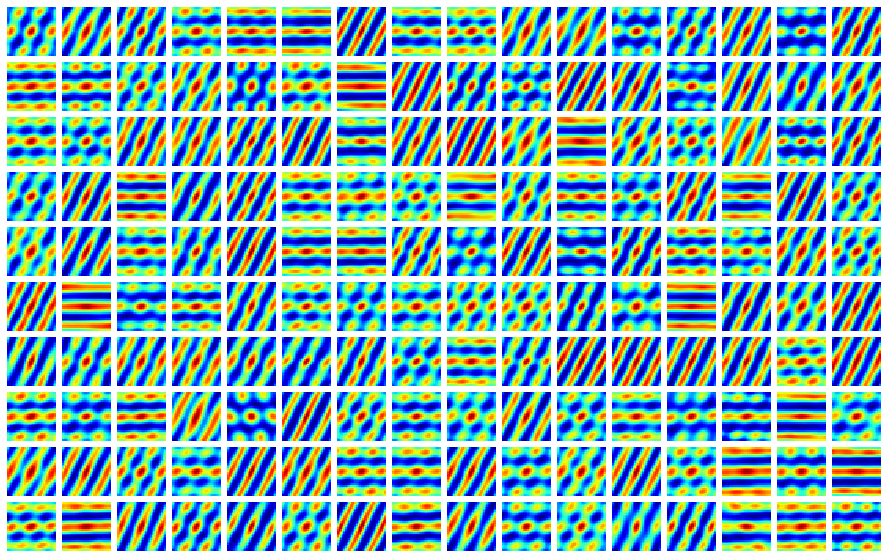

-------
Cluster1


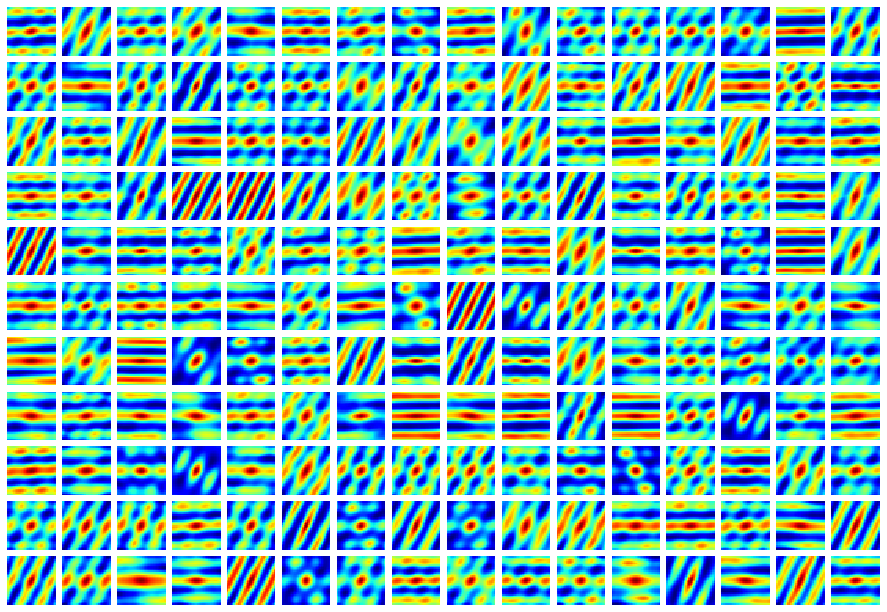

-------
Cluster2


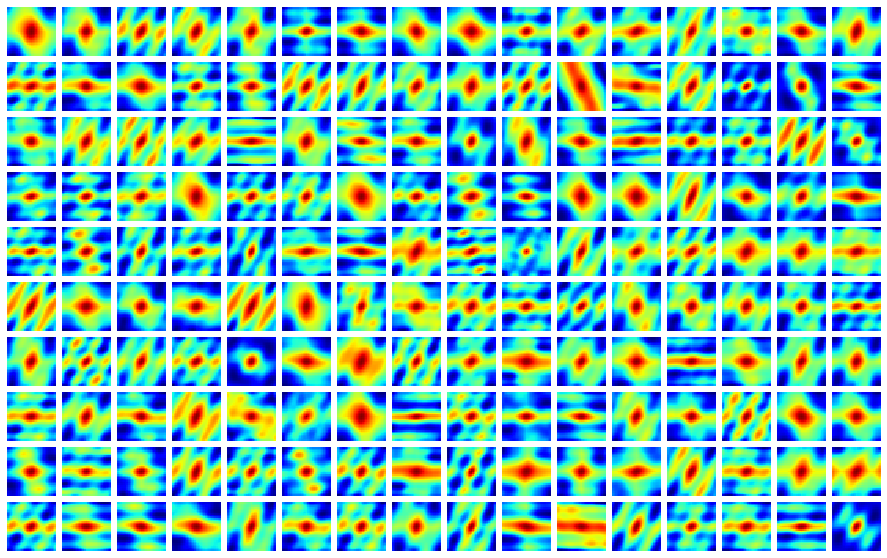

-------


In [44]:
viz_clusters(cZc,activations.sacs_)

Cluster0


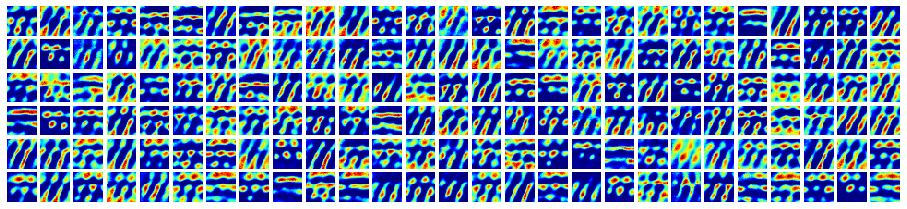

-------
Cluster1


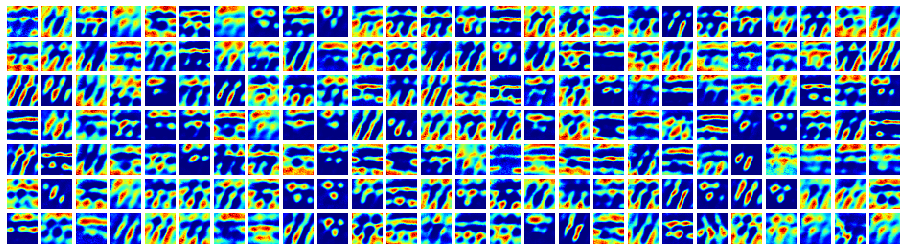

-------
Cluster2


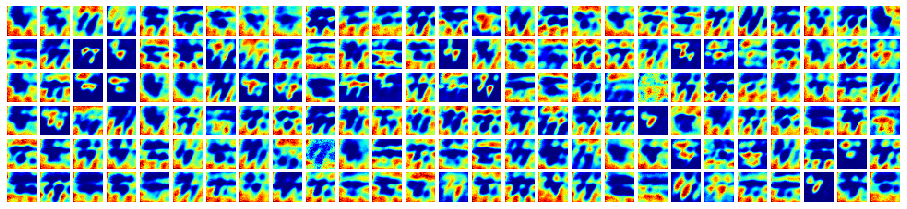

-------


In [29]:
activations.viz_clusters(cZc,activations.ratemaps_, n_col = 25)